# 마일리지할인특약 가입자/미가입자 연관규칙분석

In [21]:
import pandas as pd
import numpy as np
dt=pd.read_csv('C:/Users/mrg07/Desktop/연관분석1_0915_인코딩.csv', encoding = 'cp949')

In [30]:
df = pd.read_csv('C:/Users/mrg07/Desktop/dataset0928찐최종.csv')

In [31]:
df['차량경과년수'].unique()

array([1, 3, 2, 0], dtype=int64)

In [3]:
df['마일리지할인율'].unique()

array([    0., 15000., 12000., 10000.,  7000.,  3000.,  5000.])

In [4]:
print(np.sum(dt['antecedents'] == '마일리지할인율_15000.0'))
print(np.sum(dt['antecedents'] == '마일리지할인율_12000.0'))
print(np.sum(dt['antecedents'] == '마일리지할인율_10000.0'))

# 3000 5000 7000은 없음

403
139
19


가입 (15000)

In [5]:
search1='마일리지할인율_15000.0'
dt1=dt[dt['consequents'].str.contains(search1,case=False,na=False)]
cut_dt1=dt1[dt1['lift']>=1.5]
cut_dt1=cut_dt1.sort_values(by='lift',ascending=False)
join1=cut_dt1['antecedents'].unique()
# cut_dt.to_csv('특약 가입 특징.csv',encoding='cp949')

가입 (12000)

In [6]:
search2='마일리지할인율_12000.0'
dt2=dt[dt['consequents'].str.contains(search2,case=False,na=False)]
cut_dt2=dt2[dt2['lift']>=1.5]
cut_dt2=cut_dt2.sort_values(by='lift',ascending=False)
join2=cut_dt2['antecedents'].unique()
# cut_dt.to_csv('특약 가입 특징.csv',encoding='cp949')

가입 (10000)

In [7]:
search3='마일리지할인율_10000.0'
dt3=dt[dt['consequents'].str.contains(search3,case=False,na=False)]
cut_dt3=dt3[dt3['lift']>=1.5]
cut_dt3=cut_dt3.sort_values(by='lift',ascending=False)
join3=cut_dt3['antecedents'].unique()
# cut_dt.to_csv('특약 가입 특징.csv',encoding='cp949')

다 합쳐서 "가입"으로

In [8]:
join = np.concatenate((join1, join2, join3))

미가입

In [9]:
dt=pd.read_csv('C:/Users/mrg07/Desktop/연관분석1_0915_인코딩.csv', encoding = 'cp949')

search='마일리지할인율_0.0'
dt=dt[dt['consequents'].str.contains(search,case=False,na=False)]
cut_dt=dt[dt['lift']>=1.5]
cut_dt=cut_dt.sort_values(by='lift',ascending=False)
notjoin=cut_dt['antecedents'].unique()
# cut_dt.to_csv('특약 미가입 특징.csv',encoding='cp949')

In [10]:
notjoin

array(['직전3년간사고건수_4', '가입경력코드_1', '차량경과년수_0', '차량가입금액_2', '차량가입금액_3',
       '국산구분코드_2', '가입경력코드_8', '피보험자연령대_70', '차량가입금액_0', '차종_2',
       '운전자한정특별약관코드_12', '영상기록장치특약요율_0', '직전3년간사고건수_3'], dtype=object)

안겹치는 특징 찾기

In [11]:
res=[x for x in join if x not in notjoin]
res

['피보험자연령대_50',
 '운전자한정특별약관코드_5',
 '차량경과년수_3',
 '차종_3',
 '차량경과년수_3',
 "직전3년간사고건수_0', '가입경력코드_8",
 "운전자한정특별약관코드_3', '가입경력코드_8",
 "차량가입금액_1', '가입경력코드_8",
 "차량경과년수_3', '가입경력코드_8",
 "직전3년간사고건수_1', '가입경력코드_8",
 "차량경과년수_2', '가입경력코드_8",
 "피보험자연령대_40', '가입경력코드_8",
 "직전3년간사고건수_0', '운전자한정특별약관코드_4",
 "직전3년간사고건수_0', '차량가입금액_1",
 "직전3년간사고건수_0', '피보험자연령대_30",
 "직전3년간사고건수_0', '영상기록장치특약요율_1",
 "사고여부_0', '가입경력코드_8",
 "직전3년간사고건수_0', '운전자한정특별약관코드_3",
 "운전자한정특별약관코드_4', '가입경력코드_8",
 "가입경력코드_8', '국산구분코드_1",
 "영상기록장치특약요율_1', '가입경력코드_8",
 "가입경력코드_8', '피보험자연령대_50",
 "차종_4', '가입경력코드_8",
 "피보험자성별코드_2', '가입경력코드_8",
 '직전3년간사고건수_0',
 "사고여부_0', '가입경력코드_8",
 "차량가입금액_1', '가입경력코드_8",
 "가입경력코드_8', '국산구분코드_1",
 "차량가입금액_1', '사고여부_0",
 "영상기록장치특약요율_1', '차량가입금액_1",
 "영상기록장치특약요율_1', '사고여부_0",
 "피보험자성별코드_2', '차량가입금액_1"]

In [12]:
pred_dt = pd.read_csv('C:/Users/mrg07/Desktop/dataset0928찐최종.csv')

In [13]:
pred_dt.columns

Index(['피보험자연령대', '피보험자성별코드', '국산구분코드', '직전3년간사고건수', '차량경과년수', '가입경력코드',
       '차량가입금액', '영상기록장치특약요율', '마일리지할인율', '유효대수', '사고대수', '사고율',
       '직전3년간사고건수_유무', '차종그루핑', '마일리지할인율_가입여부', '자차보험가입여부', '차종',
       '운전자한정특별약관코드_1', '운전자한정특별약관코드_2', '운전자한정특별약관코드_3', '운전자한정특별약관코드_4',
       '운전자한정특별약관코드_5', '운전자한정특별약관코드_6', '운전자한정특별약관코드_7', '운전자한정특별약관코드_10',
       '운전자한정특별약관코드_11', '운전자한정특별약관코드_12'],
      dtype='object')

In [16]:
pred_dt['차종'].unique()

array([1, 4, 3, 2, 5, 0], dtype=int64)

In [19]:
pred_dt['차량경과년수'].unique()

array([1, 3, 2, 0], dtype=int64)

In [125]:
# 조건에 해당하는 사람을 필터링!
pred_dt1 = pred_dt[(pred_dt['마일리지할인율'] == 0) & (pred_dt['피보험자연령대']==50) | (pred_dt['운전자한정특별약관코드_5']==1) | (pred_dt['차량경과년수']==4) | (pred_dt['차종']==3) | (pred_dt['직전3년간사고건수']==0)]
#이때는 차량경과년수가 0~부터 시작이라 사고율 변화까지 적용한 코드에는 1 2 가 아니라 2 3으로 되어있을거야 !!!

In [126]:
pred_dt1

,피보험자연령대,피보험자성별코드,국산구분코드,직전3년간사고건수,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,마일리지할인율,유효대수,...,운전자한정특별약관코드_1,운전자한정특별약관코드_2,운전자한정특별약관코드_3,운전자한정특별약관코드_4,운전자한정특별약관코드_5,운전자한정특별약관코드_6,운전자한정특별약관코드_7,운전자한정특별약관코드_10,운전자한정특별약관코드_11,운전자한정특별약관코드_12
1,10,1,1,0,1,2,1,1,15000.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,10,1,1,0,3,4,0,0,15000.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,10,1,1,0,1,2,0,0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
4,10,1,1,0,2,4,1,1,15000.0,1.0,...,0,0,0,0,0,0,1,0,0,0
12,10,2,1,1,3,5,1,0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167622,40,2,1,2,3,8,1,0,0.0,2.0,...,0,1,0,0,0,0,0,0,0,0
167639,40,2,1,2,2,8,0,1,15000.0,3.0,...,0,0,0,0,1,0,0,0,0,0
167642,40,2,1,2,1,8,1,1,15000.0,2.0,...,0,0,0,0,0,0,0,0,0,1
167643,40,2,1,2,2,8,0,0,0.0,6.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
print(round(np.sum(pred_dt1['사고율'] > 1) / len(pred_dt2) * 100, 2), '%')

In [144]:
np.quantile(pred_dt1['사고율'], 0.9)

1.0

C:\Users\mrg07\AppData\Local\Temp\ipykernel_2988\2232375355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_dt1[['사고율']])


<Axes: ylabel='Density'>

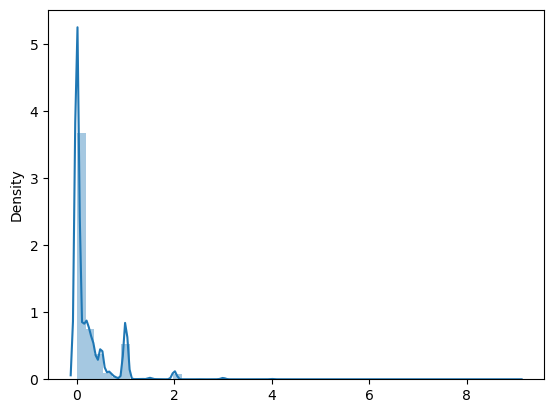

In [148]:
sns.distplot(pred_dt1[['사고율']])

In [128]:
idx1 = pred_dt1.index
pred_dt2 = pred_dt.drop(index = idx1, axis = 0)

In [129]:
print(round(np.sum(pred_dt2['사고율'] > 1) / len(pred_dt2) * 100, 2), '%')

3.86 %


In [145]:
np.quantile(pred_dt2['사고율'], 0.9)

1.0

C:\Users\mrg07\AppData\Local\Temp\ipykernel_2988\1542826548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_dt2[['사고율']])


<Axes: ylabel='Density'>

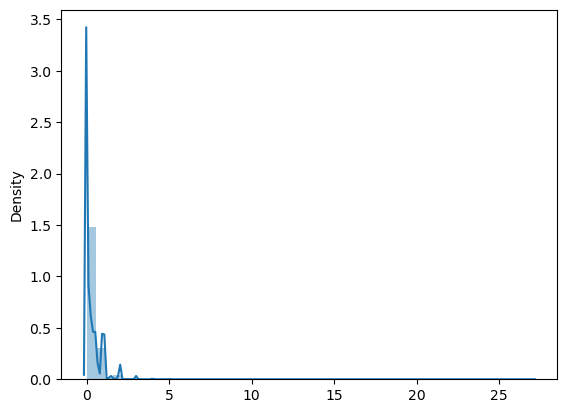

In [149]:
sns.distplot(pred_dt2[['사고율']])